In [1]:
# import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataset
data = pd.read_csv('adult.csv')

In [3]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [5]:
numerical = data[data.columns[data.dtypes==int]]

In [6]:
n = 0 
for d in data.columns:
    n += (data[d]=='?').sum()
print(n)

4262


In [7]:
# to check number of rows and columns
data.shape

(32561, 15)

In [8]:
data.replace("?", np.nan, inplace=True)

In [9]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [10]:
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [11]:
data['occupation'].mode()[0]

'Prof-specialty'

In [12]:
for x in data.columns[data.isnull().sum() != 0]:
    data[x].fillna(data[x].mode()[0], inplace=True)

In [13]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [14]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [15]:
data.income.value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [16]:
data.income.value_counts()/data.shape[0]*100

<=50K    75.919044
>50K     24.080956
Name: income, dtype: float64

In [17]:
categorical =data.columns[data.dtypes==object]

In [18]:
for c in categorical:
    print(data[c].value_counts())
    print(" ")

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
 
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
 
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64
 
Prof-specialty       5983
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales             

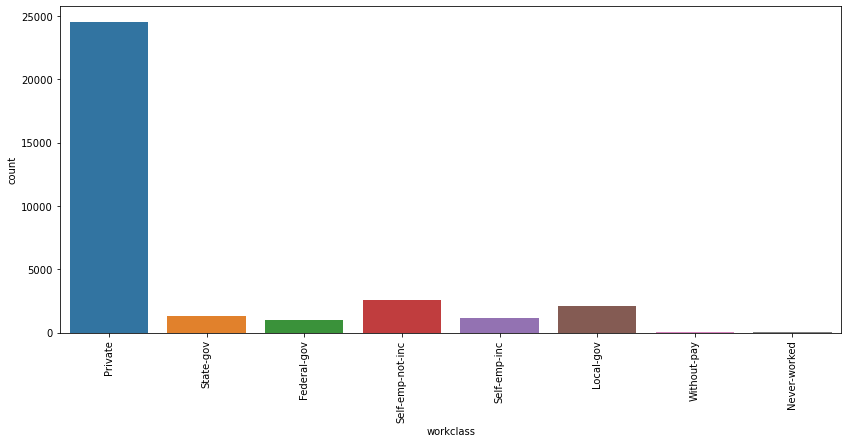

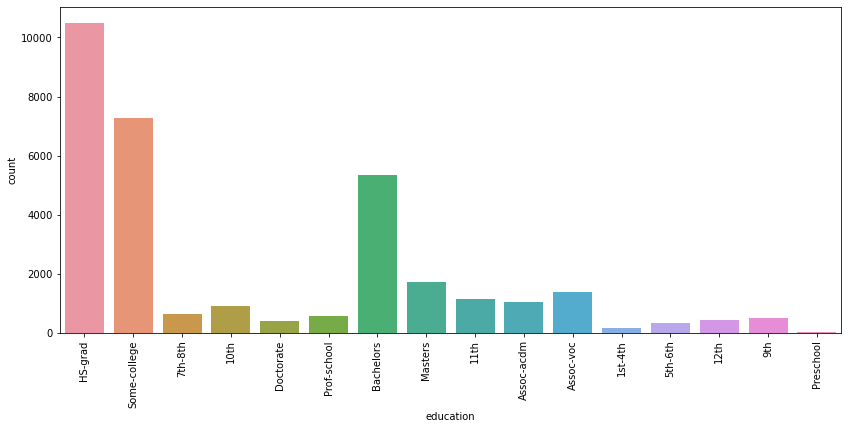

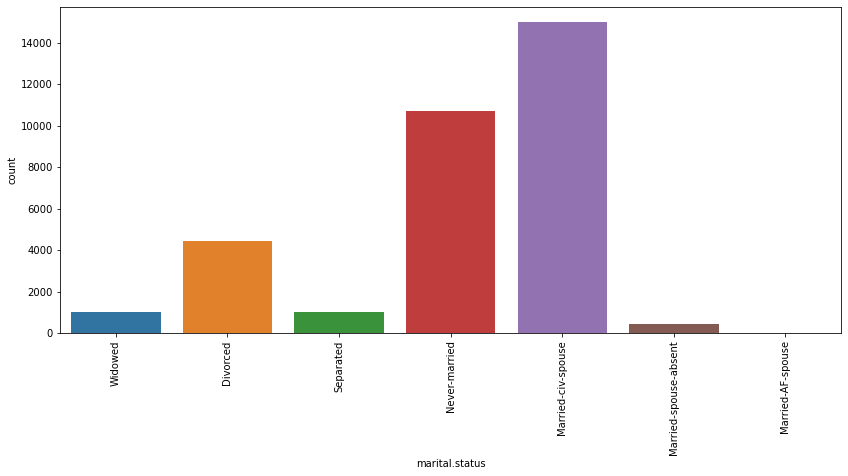

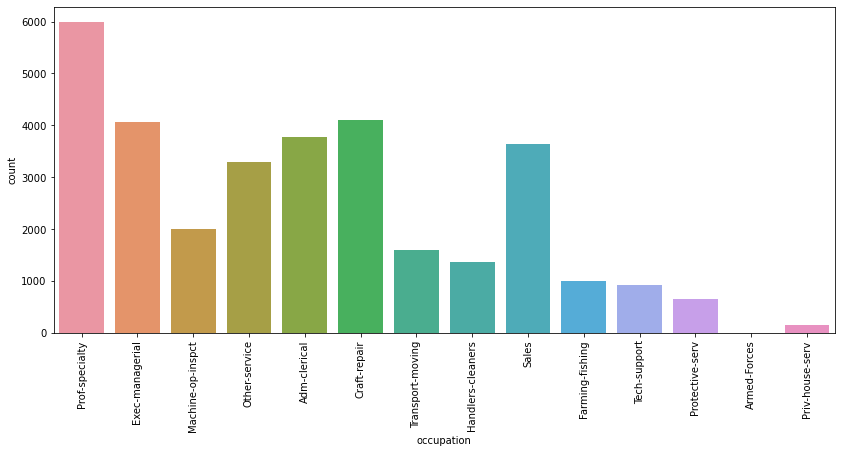

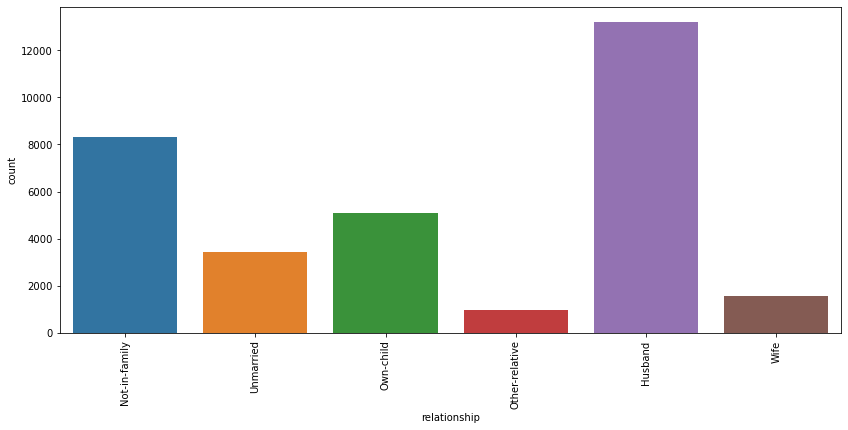

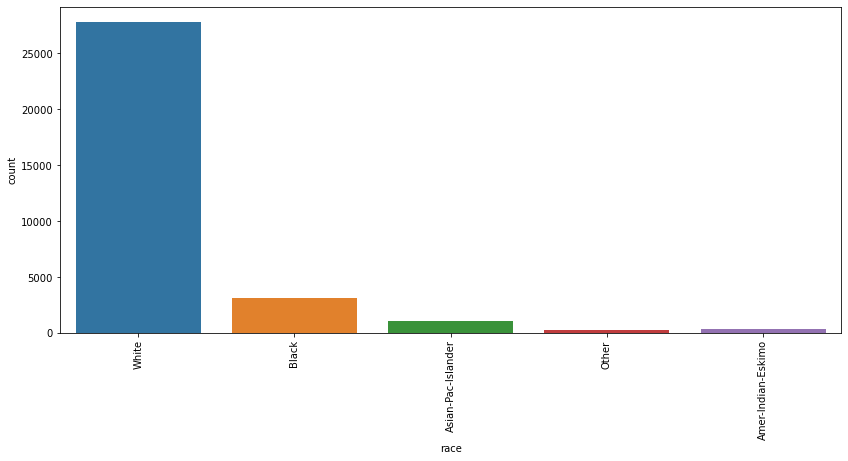

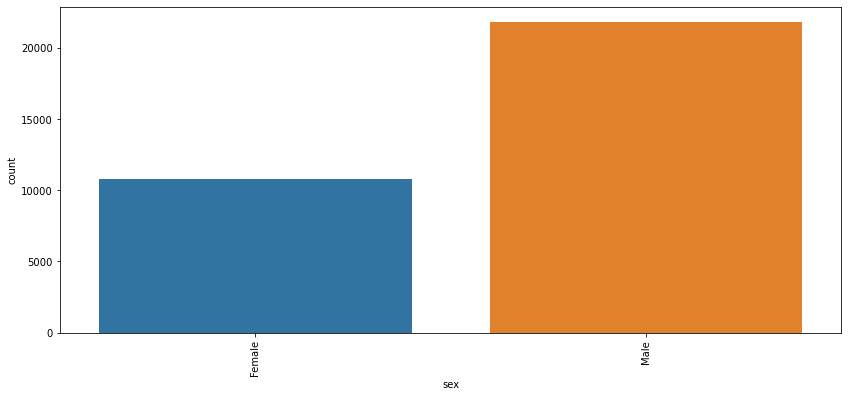

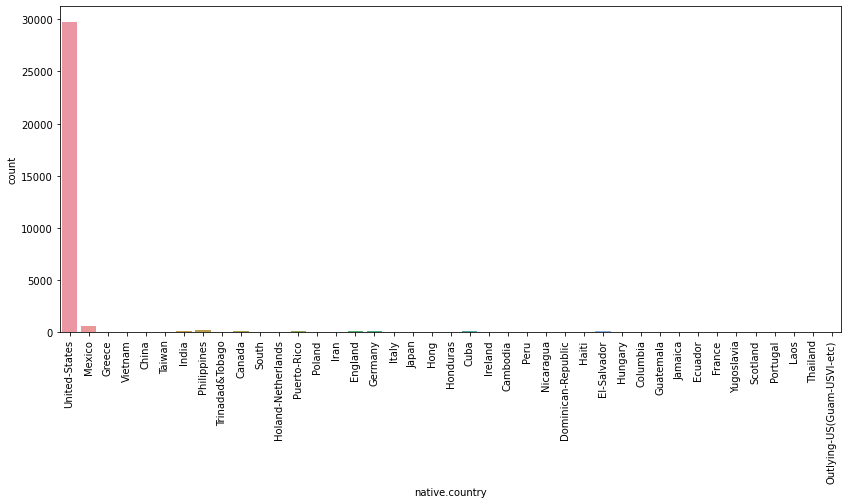

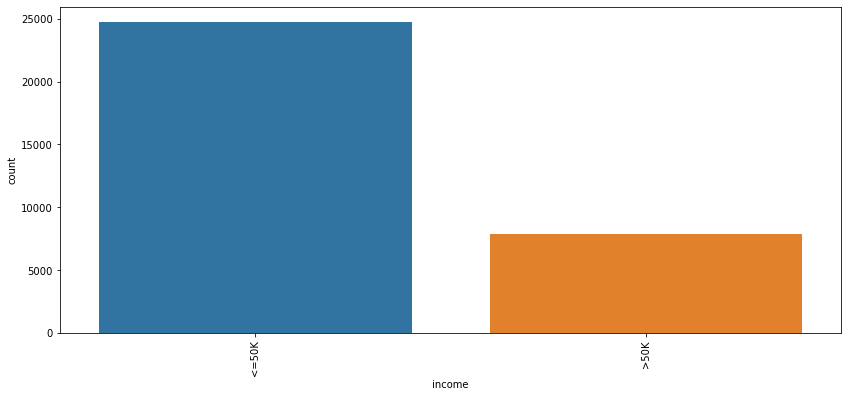

In [19]:
for c in categorical:
    plt.figure(figsize=(14,6))
    sns.countplot(x=c, data=data)
    plt.xticks(rotation=90)
    plt.show()

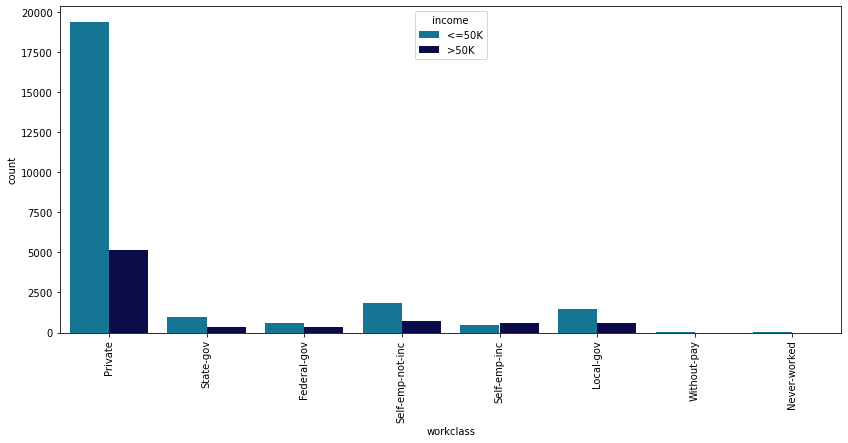

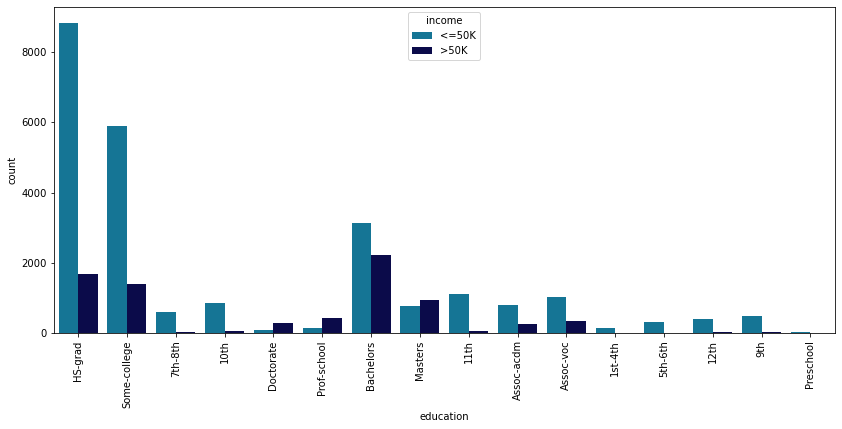

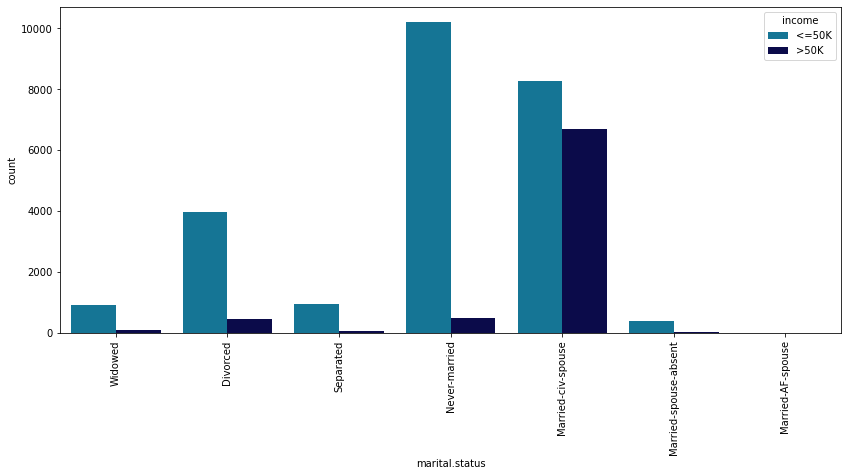

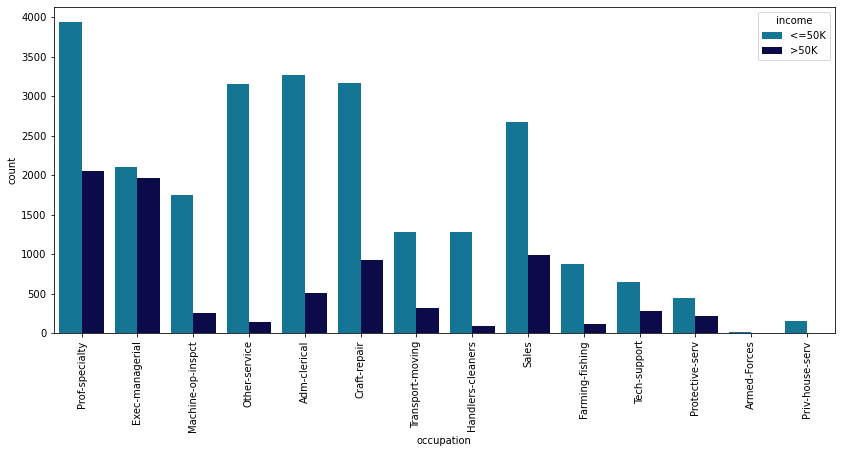

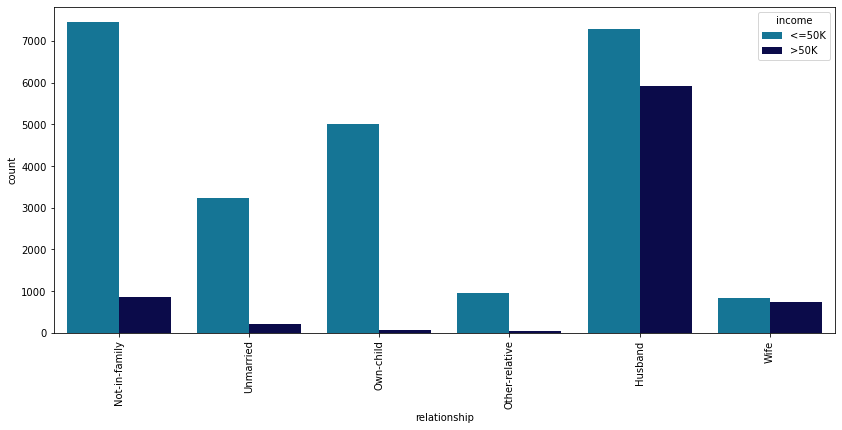

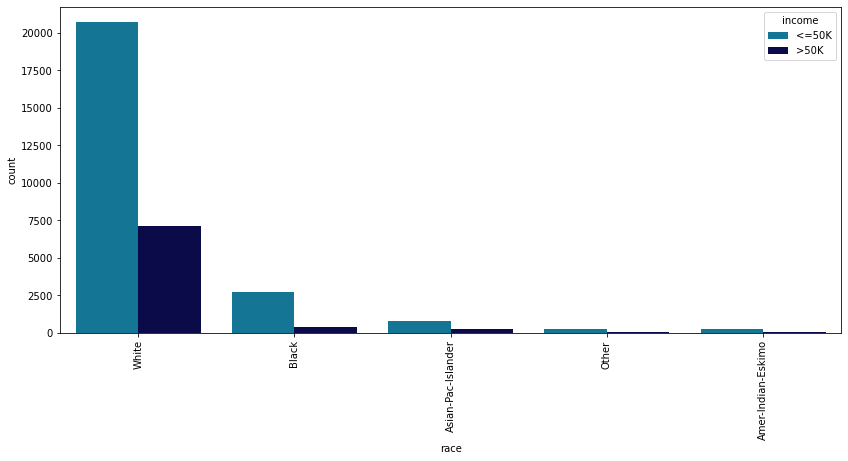

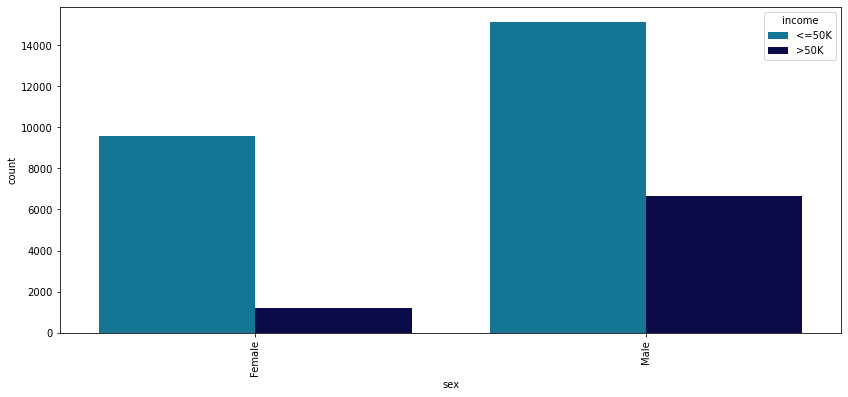

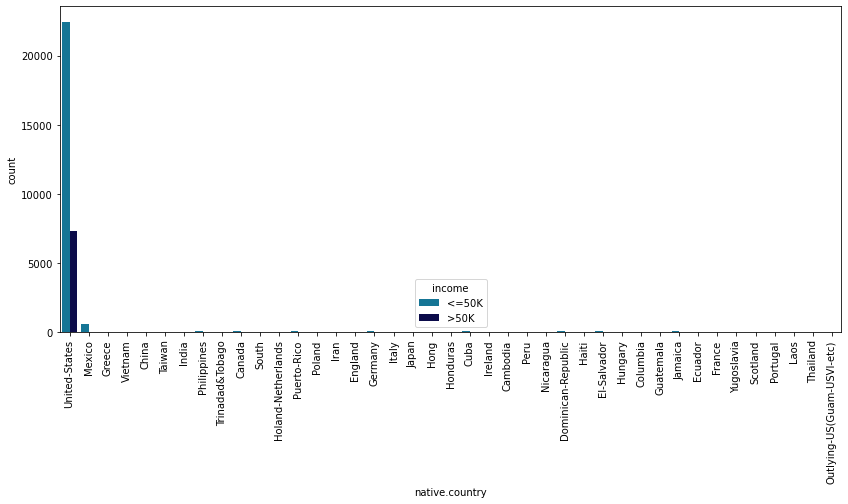

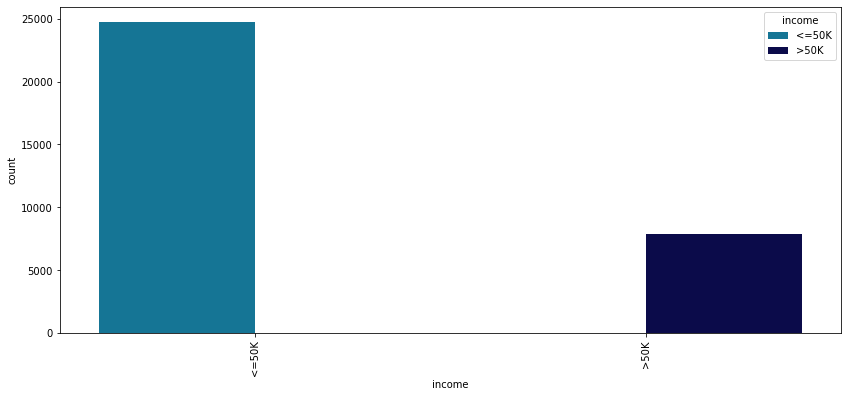

In [20]:
for c in categorical:
    plt.figure(figsize=(14,6))
    sns.countplot(x=c, data=data, hue="income", palette="ocean_r")
    plt.xticks(rotation=90)
    plt.show()

In [21]:
data.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


<AxesSubplot:>

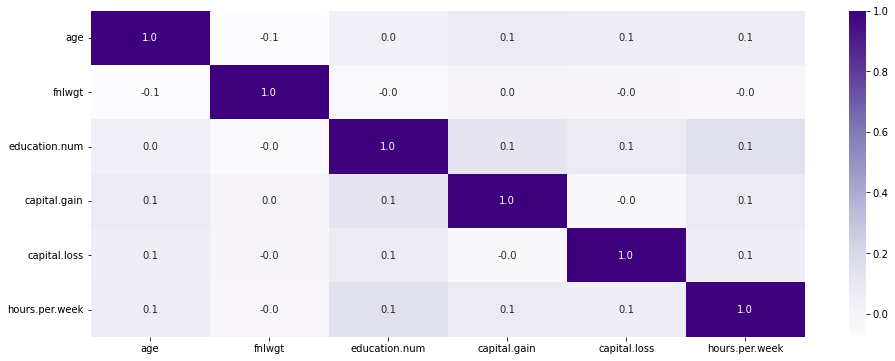

In [22]:
plt.figure(figsize=(16,6))
sns.heatmap(data.corr(), annot=True, fmt=".1f", cmap="Purples")

In [23]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for c in data.columns[data.dtypes==object]:
    encoder.fit(data[c])
    data[c] = encoder.transform(data[c])
    mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
    print(c,":", mapping)

workclass : {'Federal-gov': 0, 'Local-gov': 1, 'Never-worked': 2, 'Private': 3, 'Self-emp-inc': 4, 'Self-emp-not-inc': 5, 'State-gov': 6, 'Without-pay': 7}
education : {'10th': 0, '11th': 1, '12th': 2, '1st-4th': 3, '5th-6th': 4, '7th-8th': 5, '9th': 6, 'Assoc-acdm': 7, 'Assoc-voc': 8, 'Bachelors': 9, 'Doctorate': 10, 'HS-grad': 11, 'Masters': 12, 'Preschool': 13, 'Prof-school': 14, 'Some-college': 15}
marital.status : {'Divorced': 0, 'Married-AF-spouse': 1, 'Married-civ-spouse': 2, 'Married-spouse-absent': 3, 'Never-married': 4, 'Separated': 5, 'Widowed': 6}
occupation : {'Adm-clerical': 0, 'Armed-Forces': 1, 'Craft-repair': 2, 'Exec-managerial': 3, 'Farming-fishing': 4, 'Handlers-cleaners': 5, 'Machine-op-inspct': 6, 'Other-service': 7, 'Priv-house-serv': 8, 'Prof-specialty': 9, 'Protective-serv': 10, 'Sales': 11, 'Tech-support': 12, 'Transport-moving': 13}
relationship : {'Husband': 0, 'Not-in-family': 1, 'Other-relative': 2, 'Own-child': 3, 'Unmarried': 4, 'Wife': 5}
race : {'Amer-

In [24]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3,77053,11,9,6,9,1,4,0,0,4356,40,38,0
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38,0
2,66,3,186061,15,10,6,9,4,2,0,0,4356,40,38,0
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38,0


In [25]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
data[["age", "hours.per.week","fnlwgt", "capital.loss"]] = scaler.fit_transform(data[["age", "hours.per.week","fnlwgt", "capital.loss"]])

In [26]:
data[data["capital.gain"]!=0]["income"].value_counts()

1    1677
0    1035
Name: income, dtype: int64

In [27]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,3.769612,3,-1.067997,11,9,6,9,1,4,0,0,10.593507,-0.035429,38,0
1,3.183112,3,-0.539169,11,9,6,3,1,4,0,0,10.593507,-1.817204,38,0
2,2.010110,3,-0.035220,15,10,6,9,4,2,0,0,10.593507,-0.035429,38,0
3,1.130359,3,-0.468215,5,4,0,6,4,4,0,0,9.461864,-0.035429,38,0
4,0.177296,3,0.709482,15,10,5,9,3,4,0,0,9.461864,-0.035429,38,0


In [28]:
data[data["capital.gain"]!=0]["income"].value_counts()

1    1677
0    1035
Name: income, dtype: int64

In [29]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,3.769612,3,-1.067997,11,9,6,9,1,4,0,0,10.593507,-0.035429,38,0
1,3.183112,3,-0.539169,11,9,6,3,1,4,0,0,10.593507,-1.817204,38,0
2,2.010110,3,-0.035220,15,10,6,9,4,2,0,0,10.593507,-0.035429,38,0
3,1.130359,3,-0.468215,5,4,0,6,4,4,0,0,9.461864,-0.035429,38,0
4,0.177296,3,0.709482,15,10,5,9,3,4,0,0,9.461864,-0.035429,38,0


In [30]:
data["capital.gain"].describe()

count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital.gain, dtype: float64

In [31]:
data.income.value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [32]:
zero = data[data.income==0]

In [33]:
one = data[data.income==1]

In [34]:
from sklearn.utils import resample
oversample = resample(one, replace=True, n_samples=len(zero))

In [35]:
data2 = pd.concat([oversample, zero], axis=0)
data2.income.value_counts()

1    24720
0    24720
Name: income, dtype: int64

In [36]:
data2.shape

(49440, 15)

In [37]:
x = data2.drop(["income"], axis=1)
y = data2.income

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
# x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.4)

In [39]:
"""
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_x = pca.fit_transform(x_train)
pca_xtest = pca.transform(x_test)
"""

'\nfrom sklearn.decomposition import PCA\npca = PCA(n_components=3)\npca_x = pca.fit_transform(x_train)\npca_xtest = pca.transform(x_test)\n'

In [40]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2
selector = SelectKBest(f_classif, k=6)
selector.fit(x_train, y_train)
best = x_train.columns[selector.get_support()]
x_train_b = x_train[best]
x_test_b = x_test[best]

In [41]:
!pip install xgboost

In [42]:
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
model = XGBClassifier()
model.fit(x_train, y_train)
ans = model.predict(x_test)

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [45]:
score = accuracy_score(y_test, ans)
score*100

87.25728155339806

In [46]:
report = classification_report(y_test, ans)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      4949
           1       0.85      0.91      0.88      4939

    accuracy                           0.87      9888
   macro avg       0.87      0.87      0.87      9888
weighted avg       0.87      0.87      0.87      9888



<AxesSubplot:>

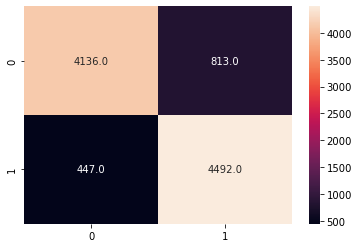

In [47]:
matrix = confusion_matrix(y_test, ans)
sns.heatmap(matrix, annot=True, fmt=".1f")